# Agregación de datos por categorías

In [1]:
import numpy as np
import pandas as pd 

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [3]:
n = 500

gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

    

In [4]:
# N(m, s) -– 

heigth = 160 + 30*np.random.randn(n)
weight = 65 + 25*np.random.randn(n)
age = 30 + 12*np.random.randn(n)
income = 18000 + 1500*np.random.randn(n)



In [6]:
data = pd.DataFrame(
    {
        'Gender' : gender_data,
        'Economic Status' : income_data,
        'Heigth' : heigth,
        'Weigth' : weight,
        'Age'    : age,
        'Income' : income
    }
)

In [8]:
data.head(10)

,Gender,Economic Status,Heigth,Weigth,Age,Income
0,Female,Rich,140.035365,86.590826,42.943947,17825.935967
1,Male,Rich,172.077908,49.122585,20.728724,18899.283051
2,Female,Middle Class,185.002766,94.050988,24.484306,16659.393917
3,Male,Rich,219.402014,73.416792,28.719723,16737.419692
4,Female,Rich,134.013040,78.424996,17.955344,19363.635943
5,Male,Middle Class,103.369363,81.014770,36.852498,18999.818637
6,Male,Rich,166.954081,85.064877,31.900201,16367.061592
7,Male,Poor,181.129832,103.326219,35.037439,15643.433952
8,Male,Poor,117.570269,52.928734,22.837564,18777.267296
9,Female,Middle Class,196.462802,51.916880,31.042344,19786.834987


In [12]:
grouped_gender = data.groupby('Gender')
grouped_gender.groups

{'Female': Int64Index([  0,   2,   4,   9,  11,  13,  14,  15,  17,  18,
             ...
             486, 487, 488, 489, 491, 492, 493, 494, 496, 498],
            dtype='int64', length=259),
 'Male': Int64Index([  1,   3,   5,   6,   7,   8,  10,  12,  16,  19,
             ...
             476, 479, 481, 482, 483, 485, 490, 495, 497, 499],
            dtype='int64', length=241)}

In [13]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Heigth     Weigth        Age        Income
0    Female            Rich  140.035365  86.590826  42.943947  17825.935967
2    Female    Middle Class  185.002766  94.050988  24.484306  16659.393917
4    Female            Rich  134.013040  78.424996  17.955344  19363.635943
9    Female    Middle Class  196.462802  51.916880  31.042344  19786.834987
11   Female            Rich  167.891057  66.541864  34.101650  18205.438748
..      ...             ...         ...        ...        ...           ...
492  Female            Poor  174.400303  41.853643  39.567070  17467.802630
493  Female    Middle Class  195.263088  34.041908  36.470729  18285.790839
494  Female            Rich  149.846497  50.668679  41.411166  18368.304098
496  Female    Middle Class  177.712276  83.963248  47.255828  15592.770078
498  Female            Rich  118.067241  75.824521  11.653718  19404.595458

[259 rows x 6 columns]
Male
    Gender Economic Status      Heigth      Weigth  

In [14]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Heigth,Weigth,Age,Income
0,Female,Rich,140.035365,86.590826,42.943947,17825.935967
2,Female,Middle Class,185.002766,94.050988,24.484306,16659.393917
4,Female,Rich,134.013040,78.424996,17.955344,19363.635943
9,Female,Middle Class,196.462802,51.916880,31.042344,19786.834987
11,Female,Rich,167.891057,66.541864,34.101650,18205.438748
...,...,...,...,...,...,...
492,Female,Poor,174.400303,41.853643,39.567070,17467.802630
493,Female,Middle Class,195.263088,34.041908,36.470729,18285.790839
494,Female,Rich,149.846497,50.668679,41.411166,18368.304098
496,Female,Middle Class,177.712276,83.963248,47.255828,15592.770078


In [18]:
grouped_Status_Gender = data.groupby(['Gender','Economic Status'])
grouped_Status_Gender

In [20]:
for names, groups in grouped_Status_Gender:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Heigth      Weigth        Age        Income
2    Female    Middle Class  185.002766   94.050988  24.484306  16659.393917
9    Female    Middle Class  196.462802   51.916880  31.042344  19786.834987
21   Female    Middle Class  232.195150   83.319066  28.972761  18215.223860
26   Female    Middle Class  135.353851  112.486426  48.656119  15158.725632
40   Female    Middle Class  168.488312   95.523352  41.076032  17666.285855
..      ...             ...         ...         ...        ...           ...
477  Female    Middle Class  187.120206   86.027178  14.538131  17954.889807
488  Female    Middle Class  137.316889   71.657846  24.504085  20167.486101
489  Female    Middle Class  119.738520   80.042453  32.216239  19270.428482
493  Female    Middle Class  195.263088   34.041908  36.470729  18285.790839
496  Female    Middle Class  177.712276   83.963248  47.255828  15592.770078

[93 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [21]:
grouped_Status_Gender.sum()

Heigth       Weigth          Age        Income
Gender Economic Status                                                      
Female Middle Class     14897.092941  6175.439909  2804.858262  1.675650e+06
       Poor             15155.149825  6454.929050  2673.009761  1.749812e+06
       Rich             11113.300663  4473.441815  1916.710434  1.242715e+06
Male   Middle Class     11675.870977  4581.339781  2250.572911  1.329630e+06
       Poor             12937.102362  5274.448634  2364.218169  1.453608e+06
       Rich             13720.173863  5966.816904  2646.116155  1.537944e+06

In [22]:
grouped_Status_Gender.mean()

Heigth     Weigth        Age        Income
Gender Economic Status                                                
Female Middle Class     160.183795  66.402580  30.159766  18017.738904
       Poor             156.238658  66.545660  27.556802  18039.295186
       Rich             161.062328  64.832490  27.778412  18010.369493
Male   Middle Class     157.782040  61.909997  30.413147  17967.979463
       Poor             159.717313  65.116650  29.187879  17945.780329
       Rich             159.536905  69.381592  30.768792  17883.074588

In [23]:
grouped_Status_Gender.size()

Gender  Economic Status
Female  Middle Class       93
        Poor               97
        Rich               69
Male    Middle Class       74
        Poor               81
        Rich               86
dtype: int64

In [25]:
grouped_Status_Gender.describe()

Heigth                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      93.0  160.183795  32.008262   75.350125  137.023313   
       Poor              97.0  156.238658  29.868374   72.943468  138.768112   
       Rich              69.0  161.062328  28.251131   95.474357  140.035365   
Male   Middle Class      74.0  157.782040  31.102442  103.369363  133.632081   
       Poor              81.0  159.717313  28.838837   87.942580  142.272214   
       Rich              86.0  159.536905  28.068739   87.224718  140.607835   

                                                           Weigth             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     160.808981  185.256690  232.195150   93.0  66.402580   
       Poor             156.355423  176.689931  229.588504   97.0  66.545660   
       Rich             162.281774  178.546108  214.915240   69.0  64.832490   
Male   Middle Class     157.732176  179.961585  235.196470   74.0  61.909997   
       Poor             161.034087  177.164813  221.755264   81.0  65.116650   
       Rich             163.523801  177.517183  219.402014   86.0  69.381592   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.089992  60.639614   93.0  18017.738904   
       Poor             ...  37.619392  50.152045   97.0  18039.295186   
       Rich             ...  37.682157  64.805375   69.0  18010.369493   
Male   Middle Class     ...  36.882509  53.754493   74.0  17967.979463   
       Poor             ...  36.744968  56.323726   81.0  17945.780329   
       Rich             ...  39.211489  58.706421   86.0  17883.074588   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class     1456.095793  14423.796137  17060.335362  17954.889807   
       Poor             1412.094915  14496.326929  16972.024075  17941.307146   
       Rich             1419.544972  13917.710975  17146.524499  18054.167160   
Male   Middle Class     1318.210826  15075.500136  17074.701320  17947.758963   
       Poor             1478.295977  14355.280888  17038.702747  17930.119462   
       Rich             1488.722849  15240.777760  16622.103988  17939.280136   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     19107.151788  20964.876145  
       Poor             19058.618430  21760.647856  
       Rich             19127.325493  21201.287144  
Male   Middle Class     18884.727144  21601.868888  
       Poor             18841.494774  21350.300723  
       Rich             19087.290976  21276.338394  

[6 rows x 32 columns]

In [27]:
grouped_Status_Gender.aggregate(
    {
        'Income' : np.sum,
        'Age'    : np.mean,
        'Heigth' : np.std,
        
    }
)

Income        Age     Heigth
Gender Economic Status                                    
Female Middle Class     1.675650e+06  30.159766  32.008262
       Poor             1.749812e+06  27.556802  29.868374
       Rich             1.242715e+06  27.778412  28.251131
Male   Middle Class     1.329630e+06  30.413147  31.102442
       Poor             1.453608e+06  29.187879  28.838837
       Rich             1.537944e+06  30.768792  28.068739

In [28]:
grouped_Status_Gender.aggregate(
{
    'Age' : np.mean,
    'Heigth' : lambda h:(np.mean(h)/np.std(h))
}

)

Age    Heigth
Gender Economic Status                     
Female Middle Class     30.159766  5.031576
       Poor             27.556802  5.258080
       Rich             27.778412  5.742860
Male   Middle Class     30.413147  5.107607
       Poor             29.187879  5.572778
       Rich             30.768792  5.717129

In [29]:
grouped_Status_Gender.aggregate([np.sum, np.mean, np.std])

Heigth                              Weigth  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14897.092941  160.183795  32.008262  6175.439909   
       Poor             15155.149825  156.238658  29.868374  6454.929050   
       Rich             11113.300663  161.062328  28.251131  4473.441815   
Male   Middle Class     11675.870977  157.782040  31.102442  4581.339781   
       Poor             12937.102362  159.717313  28.838837  5274.448634   
       Rich             13720.173863  159.536905  28.068739  5966.816904   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     66.402580  21.530489  2804.858262  30.159766   
       Poor             66.545660  24.175006  2673.009761  27.556802   
       Rich             64.832490  25.427669  1916.710434  27.778412   
Male   Middle Class     61.909997  25.622296  2250.572911  30.413147   
       Poor             65.116650  23.588283  2364.218169  29.187879   
       Rich             69.381592  24.223223  2646.116155  30.768792   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     12.875937  1.675650e+06  18017.738904  1456.095793  
       Poor             11.577166  1.749812e+06  18039.295186  1412.094915  
       Rich             13.178591  1.242715e+06  18010.369493  1419.544972  
Male   Middle Class     10.207133  1.329630e+06  17967.979463  1318.210826  
       Poor             11.728609  1.453608e+06  17945.780329  1478.295977  
       Rich             12.139589  1.537944e+06  17883.074588  1488.722849

In [30]:
grouped_Status_Gender.aggregate([lambda x: np.mean(x) / np.std(x)] )

Heigth    Weigth       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.031576  3.100835  2.355031  12.441075
       Poor             5.258080  2.766963  2.392637  12.841209
       Rich             5.742860  2.568362  2.123286  12.780374
Male   Middle Class     5.107607  2.432748  2.999936  13.723624
       Poor             5.572778  2.777750  2.504111  12.215141
       Rich             5.717129  2.881059  2.549448  12.082814

# Filtrado de datos

In [33]:
grouped_Status_Gender['Age'].filter(lambda x: x.sum() > 2400)

1      20.728724
2      24.484306
3      28.719723
6      31.900201
9      31.042344
         ...    
488    24.504085
489    32.216239
492    39.567070
493    36.470729
496    47.255828
Name: Age, Length: 276, dtype: float64

# Transformación de variables

In [36]:
zscore = lambda x: (x- x.mean())/x.std()

In [41]:
zgroup = grouped_Status_Gender.transform(zscore)

<AxesSubplot:>

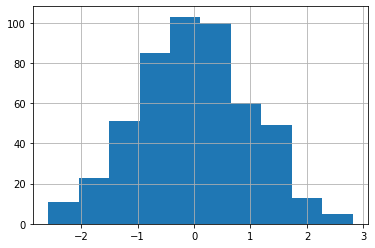

In [43]:
zgroup['Age'].hist()

Bueno para rellenar cuando faltan valores

In [44]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [45]:
grouped_Status_Gender.transform(fill_na_mean)

,Heigth,Weigth,Age,Income
0,140.035365,86.590826,42.943947,17825.935967
1,172.077908,49.122585,20.728724,18899.283051
2,185.002766,94.050988,24.484306,16659.393917
3,219.402014,73.416792,28.719723,16737.419692
4,134.013040,78.424996,17.955344,19363.635943
...,...,...,...,...
495,169.577975,33.498478,39.516131,17538.538866
496,177.712276,83.963248,47.255828,15592.770078
497,196.432190,48.945740,28.926348,17040.524078
498,118.067241,75.824521,11.653718,19404.595458


# Operaciones diversas útiles

In [46]:
grouped_Status_Gender.head(1)

,Gender,Economic Status,Heigth,Weigth,Age,Income
0,Female,Rich,140.035365,86.590826,42.943947,17825.935967
1,Male,Rich,172.077908,49.122585,20.728724,18899.283051
2,Female,Middle Class,185.002766,94.050988,24.484306,16659.393917
5,Male,Middle Class,103.369363,81.014770,36.852498,18999.818637
7,Male,Poor,181.129832,103.326219,35.037439,15643.433952
13,Female,Poor,116.478425,69.241859,50.152045,21516.048598


In [47]:
grouped_Status_Gender.nth(32)

Heigth      Weigth        Age        Income
Gender Economic Status                                                 
Female Middle Class     149.237721   34.729017  10.663456  17546.317311
       Poor             143.311633   82.304309  37.011327  17427.720228
       Rich             178.546108   29.679798  17.054366  16328.214765
Male   Middle Class     110.526397  111.214141  29.808277  18149.100071
       Poor             172.779160   76.152447  13.832639  18462.536254
       Rich              87.224718   72.570120  45.434649  19486.326373

In [48]:
data_sorted = data.sort_values(['Age', 'Income'])
data_sorted

,Gender,Economic Status,Heigth,Weigth,Age,Income
166,Female,Rich,155.840440,36.352073,-4.542971,17811.978269
437,Female,Rich,114.758039,20.918711,-0.523697,16269.084960
322,Female,Poor,229.588504,56.766488,0.055507,19214.955541
311,Female,Poor,190.797512,56.685071,2.483052,16442.596752
121,Male,Rich,111.220536,85.640645,2.838403,18865.457949
...,...,...,...,...,...,...
463,Male,Rich,141.742153,84.098481,58.019942,15399.524874
204,Female,Middle Class,192.140995,56.100710,58.299384,18665.961130
243,Male,Rich,137.953320,55.033073,58.706421,16557.386076
275,Female,Middle Class,75.350125,80.197016,60.639614,17915.077065


In [52]:
age_grouped = data_sorted.groupby('Gender')
age_grouped.head(1)

,Gender,Economic Status,Heigth,Weigth,Age,Income
166,Female,Rich,155.840440,36.352073,-4.542971,17811.978269
121,Male,Rich,111.220536,85.640645,2.838403,18865.457949


In [53]:
age_grouped.tail(1)

,Gender,Economic Status,Heigth,Weigth,Age,Income
243,Male,Rich,137.953320,55.033073,58.706421,16557.386076
417,Female,Rich,213.154368,48.517618,64.805375,18242.550574
